In [4]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# HR Analysis Logistic Regression

In [2]:
df = pd.read_csv(r'C:\Users\win\Desktop\working roject\HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### 1. EDA Exploratory data analysis 

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Text(0.5, 1.0, 'Satisfaction level vs. employee Retention')

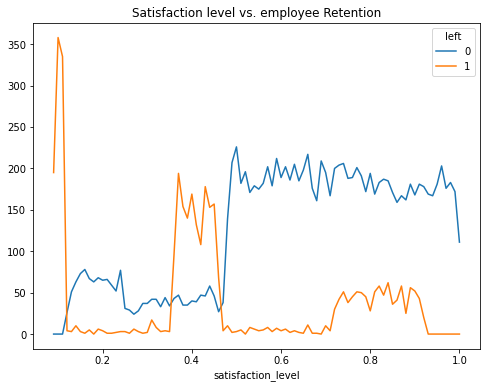

In [15]:
pd.crosstab(df.satisfaction_level,df.left).plot(kind = 'line',figsize= (8,6))
plt.title('Satisfaction level vs. employee Retention')

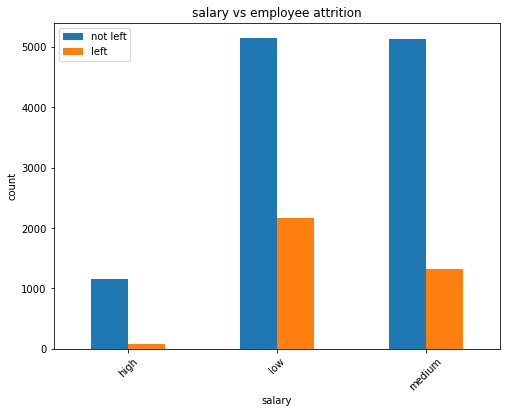

In [30]:
#lets salary 
newdf = df['salary']
rep = newdf.replace(['low','medium','high'],[1,2,3])
crosstab = pd.crosstab(newdf,df.left)
ax = crosstab.plot(kind='bar',figsize= (8,6))

ax.legend(['not left','left'])
plt.xlabel('salary')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.title('salary vs employee attrition')
plt.show()

In [31]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

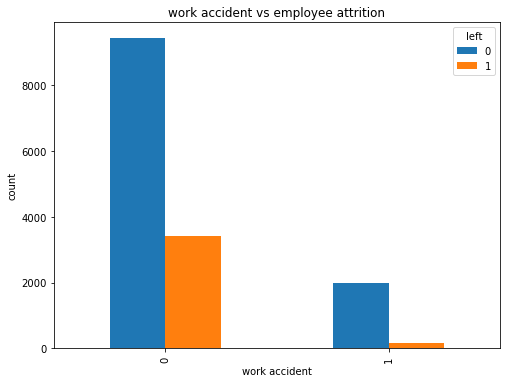

In [32]:
crosstab = pd.crosstab(df.Work_accident,df.left)

ax = crosstab.plot(kind='bar',figsize=(8,6))

plt.xlabel('work accident')
plt.ylabel('count')
plt.title('work accident vs employee attrition')

plt.show()

* we can see that employee are not lefting company because of work accident .

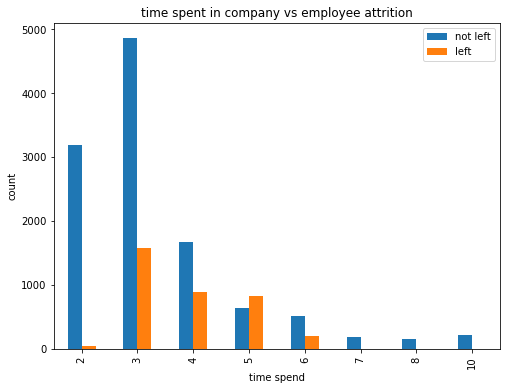

In [34]:
crosstab = pd.crosstab(df.time_spend_company,df.left)

ax = crosstab.plot(kind='bar',figsize=(8,6))
ax.legend(['not left','left'])
plt.xlabel('time spend')
plt.ylabel('count')
plt.title('time spent in company vs employee attrition')

plt.show()

* we can see that those who spend the most time at work didn't leave.

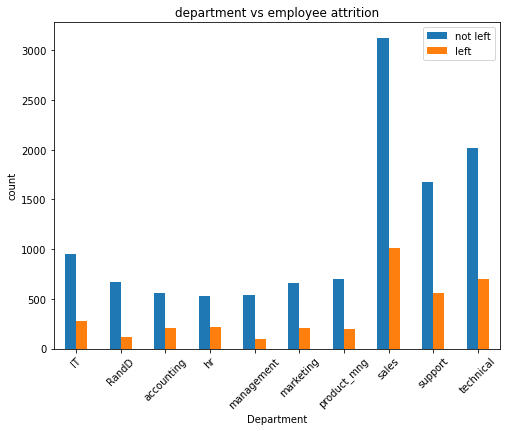

In [37]:
crosstab = pd.crosstab(df.Department,df.left)

ax = crosstab.plot(kind='bar',figsize=(8,6))
ax.legend(['not left','left'])
plt.xlabel('Department')
plt.ylabel('count')
plt.title('department vs employee attrition')
plt.xticks(rotation = 45)
plt.show()

* most people who left their job were in the sales department .

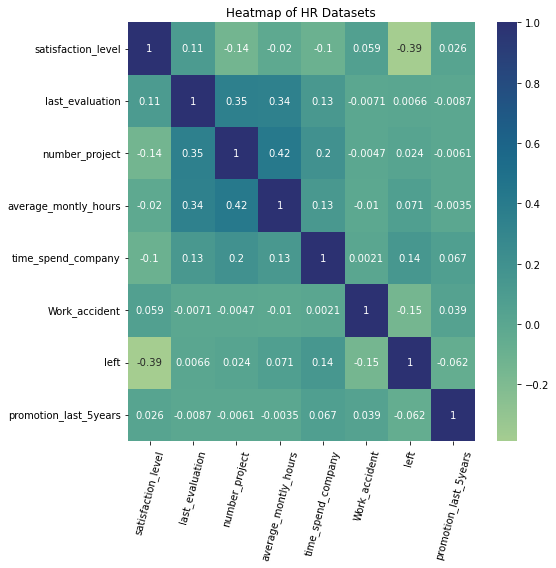

In [57]:
#heatmap 

data_matrix = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data_matrix,cmap ='crest',annot = True)

plt.xticks(rotation =75)
plt.yticks(rotation = 0)
plt.title('Heatmap of HR Datasets')
plt.tight_layout()
plt.show()

# feature engineering 

* from the dataset we can conclude that the following are the independent variables:
    
 * 1.Satisfaction level
 * 2.time spend company 
 * 3.average monthly hours
 * 4.promotion last Five years
 * 5.salary

In [59]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [62]:
df1 = df[['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years'
        ,'salary']]

df1.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,low
1,0.80,262,6,0,medium
2,0.11,272,4,0,medium
3,0.72,223,5,0,low
4,0.37,159,3,0,low


In [65]:
# ok so we have salary as categorical value,we need to create dummies variable for it  .
salary_dummies = pd.get_dummies(df1.salary,prefix = "salary")
df_with_dummies = pd.concat([df1,salary_dummies],axis = 'columns')
df_with_dummies.head()


,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,3,0,low,0,1,0
1,0.80,262,6,0,medium,0,0,1
2,0.11,272,4,0,medium,0,0,1
3,0.72,223,5,0,low,0,1,0
4,0.37,159,3,0,low,0,1,0


In [66]:
df_with_dummies.drop('salary',axis = 'columns',inplace = True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,1,0
1,0.80,262,6,0,0,0,1
2,0.11,272,4,0,0,0,1
3,0.72,223,5,0,0,1,0
4,0.37,159,3,0,0,1,0


In [67]:
# lets go for linear model ,Independent variable 

x = df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,1,0
1,0.80,262,6,0,0,0,1
2,0.11,272,4,0,0,0,1
3,0.72,223,5,0,0,1,0
4,0.37,159,3,0,0,1,0


In [68]:
# dependent variable
y = df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

## model building 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.4)

In [71]:
model = LogisticRegression()

In [72]:
model.fit(x_train,y_train)

E:\python software\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
#prediction 

model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [74]:
x_test

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
11077,0.97,150,2,0,0,0,1
11562,0.76,247,3,0,0,1,0
13377,0.48,274,6,0,0,0,1
7082,0.26,178,6,0,0,1,0
12414,0.91,233,5,0,0,0,1
...,...,...,...,...,...,...,...
6045,0.24,232,3,0,0,0,1
11751,0.99,265,4,0,0,0,1
641,0.74,228,5,0,0,1,0
1580,0.49,244,3,0,0,1,0


In [77]:
model.predict_proba(x_test)

array([[0.96253827, 0.03746173],
       [0.83724445, 0.16275555],
       [0.59175569, 0.40824431],
       ...,
       [0.76955713, 0.23044287],
       [0.65211075, 0.34788925],
       [0.44832211, 0.55167789]])

#### model evalution


In [78]:
model.score(x_test,y_test)

0.7633333333333333

In [93]:
model.predict_proba([[0.95,88,2,0,0,1,0]])  # prediction complete 


array([[0.94594365, 0.05405635]])